In [1]:
df <- read.csv("science_full.csv", sep=",", header=T, 
               fileEncoding="UTF-8-BOM")
attach(df)
df

year,personnel,operation,invest,subsidy,others,total,mhesi,dept
2555,327.5,419.2,155.4,7101.5,48.7,8052.3,0,3895977
2556,345.4,439.7,172.7,7716.1,156.9,8830.8,0,4236004
2557,360.5,404.2,244.8,7620.5,133.6,8763.6,0,4590713
2558,365.6,394.6,215.3,7800.0,121.1,8896.6,0,4973664
2559,398.3,321.0,505.5,8391.7,109.2,9725.7,0,5071762
2560,402.3,338.4,620.9,8922.8,1218.4,11502.8,0,5338301
2561,406.6,337.8,682.5,12124.0,724.5,14275.4,0,5655236
2562,415.0,324.5,781.1,12947.3,259.7,14727.6,0,6039719
2563,11700.1,1012.7,9091.6,104146.9,1944.2,127895.5,1,6388920
2564,11248.4,939.9,9956.4,104384.6,1597.7,128127.0,1,7168365


In [2]:
x1 <- personnel
x2 <- operation
x3 <- invest
x4 <- subsidy
x5 <- others
x6 <- mhesi
x7 <- dept
y <- total

In [3]:
model <- lm(y ~ x1+x2+x3+x4+x5+x6+x7)
summary(model)

Warning message in summary.lm(model):
"essentially perfect fit: summary may be unreliable"


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7)

Residuals:
         1          2          3          4          5          6          7 
-1.933e-12  4.095e-12 -4.224e-12  7.844e-13  2.167e-12 -6.070e-13  1.132e-12 
         8          9         10 
-1.414e-12 -8.324e-14  8.324e-14 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -1.536e-10  1.066e-10 -1.441e+00    0.286    
x1           1.000e+00  8.089e-14  1.236e+13   <2e-16 ***
x2           1.000e+00  2.038e-13  4.908e+12   <2e-16 ***
x3           1.000e+00  5.548e-14  1.802e+13   <2e-16 ***
x4           1.000e+00  3.727e-15  2.683e+14   <2e-16 ***
x5           1.000e+00  8.674e-15  1.153e+14   <2e-16 ***
x6          -1.811e-09  1.190e-09 -1.522e+00    0.267    
x7          -1.450e-18  8.071e-18 -1.800e-01    0.874    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.864e-12 on 2 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squ

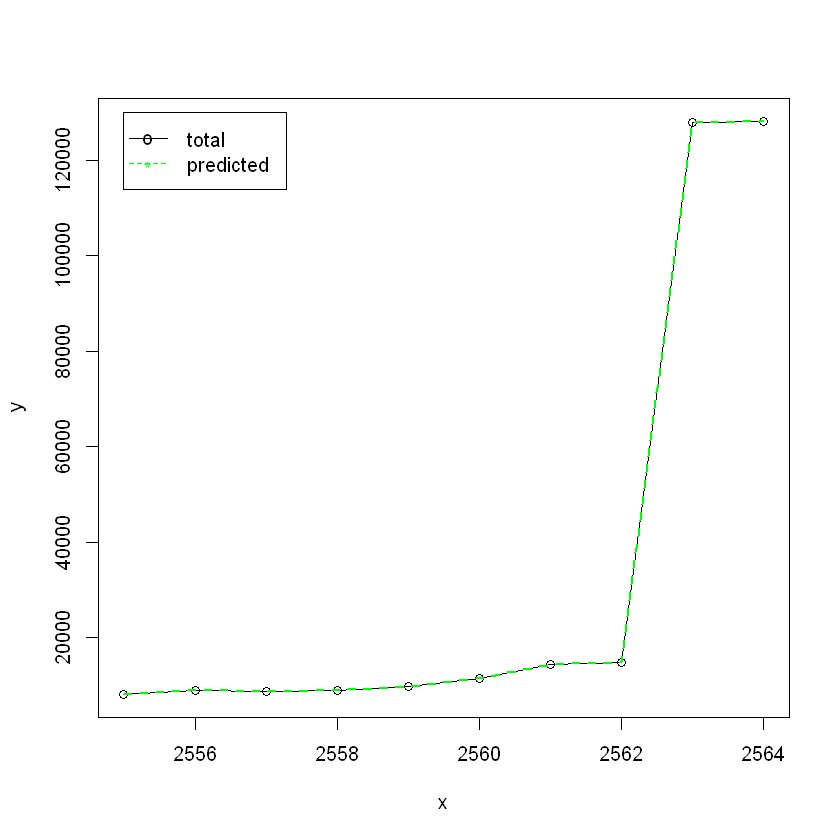

In [4]:
year <- year
y1 <- -1.536e-10 + x1 + x2 + x3 + x4 + x5 + x6*(-1.811e-09) + x7*(-1.450e-18)
plot(year, y, type="o", xlab="x", ylab="y")
lines(year,y1,lty=2,lwd=2,col="green")
legend(2555,130000,legend=c("total","predicted"), col=c("black","green"),pch=c("o","*"),lty=c(1,2))

In [5]:
install.packages("Metrics")
library(Metrics)
mse(y, y1)

package 'Metrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpGGcRy5\downloaded_packages


Warning message:
"package 'Metrics' was built under R version 3.6.3"

[1] 8.039822e-19

In [6]:
rmse(y, y1)

[1] 8.966506e-10

In [7]:
mae(y, y1)

[1] 5.243237e-10

In [8]:
mape(y, y1)

[1] 1.578532e-14

In [9]:
rss <- sum((y1 - y) ^ 2)  ## residual sum of squares
tss <- sum((y - mean(y)) ^ 2)  ## total sum of squares
rsq <- 1 - rss/tss
rsq

[1] 1

In [10]:
install.packages("ehaGoF")
library(ehaGoF)

package 'ehaGoF' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpGGcRy5\downloaded_packages


Warning message:
"package 'ehaGoF' was built under R version 3.6.3"

In [11]:
gofCoD(y, y1)

[1] 1